
# Introduction to CNN and Computer Vision

## Get data

In [9]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# !curl -o pizza_meat.zip https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


In [10]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_meat.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [11]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_meat/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['meat', 'pizza'], dtype='<U5')

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {image.shape}")
  return image


['3324050.jpg']
Image shape: (512, 512, 3)


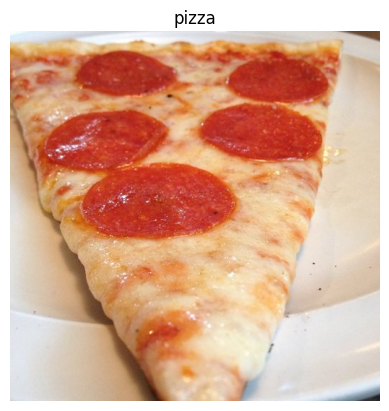

In [13]:
img = view_random_image("pizza_meat/train/", "pizza")

## Building a CNN model

* Load images
* Preprocess images
* Build CNN tf

In [14]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1 / 255.0)
valid_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_data = train_datagen.flow_from_directory(
    directory="pizza_meat/train",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
    seed=42,
)

valid_data = valid_datagen.flow_from_directory(
    directory="pizza_meat/test",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
    seed=42,
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10, kernel_size=3, activation="relu", input_shape=(256, 256, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)
# 0.88

Epoch 1/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6096 - accuracy: 0.6733 - val_loss: 0.4248 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4306 - accuracy: 0.8020 - val_loss: 0.3372 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4018 - accuracy: 0.8233 - val_loss: 0.3205 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.3625 - accuracy: 0.8387 - val_loss: 0.3359 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.3267 - accuracy: 0.8700 - val_loss: 0.2926 - val_accuracy: 0.8800


In [16]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10, kernel_size=3, activation="relu", input_shape=(256, 256, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)
#0.88

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.5859 - accuracy: 0.6887 - val_loss: 0.4419 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4699 - accuracy: 0.7740 - val_loss: 0.3943 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4104 - accuracy: 0.8100 - val_loss: 0.3842 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.3422 - accuracy: 0.8487 - val_loss: 0.3400 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 21s 438ms/step - loss: 0.2383 - accuracy: 0.9107 - val_loss: 0.3199 - val_accuracy: 0.8700


In [17]:
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10, kernel_size=3, activation="relu", input_shape=(256, 256, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)
#0.89

Epoch 1/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6112 - accuracy: 0.6707 - val_loss: 0.4302 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4496 - accuracy: 0.7927 - val_loss: 0.3724 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.3782 - accuracy: 0.8353 - val_loss: 0.3285 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.2877 - accuracy: 0.8813 - val_loss: 0.3601 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.2161 - accuracy: 0.9173 - val_loss: 0.4021 - val_accuracy: 0.8060


In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 126, 126, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 10)        0         
 g2D)                                                 

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 10)        0         
 g2D)                                                 

In [20]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 61, 61, 10)        0         
 g2D)                                                 

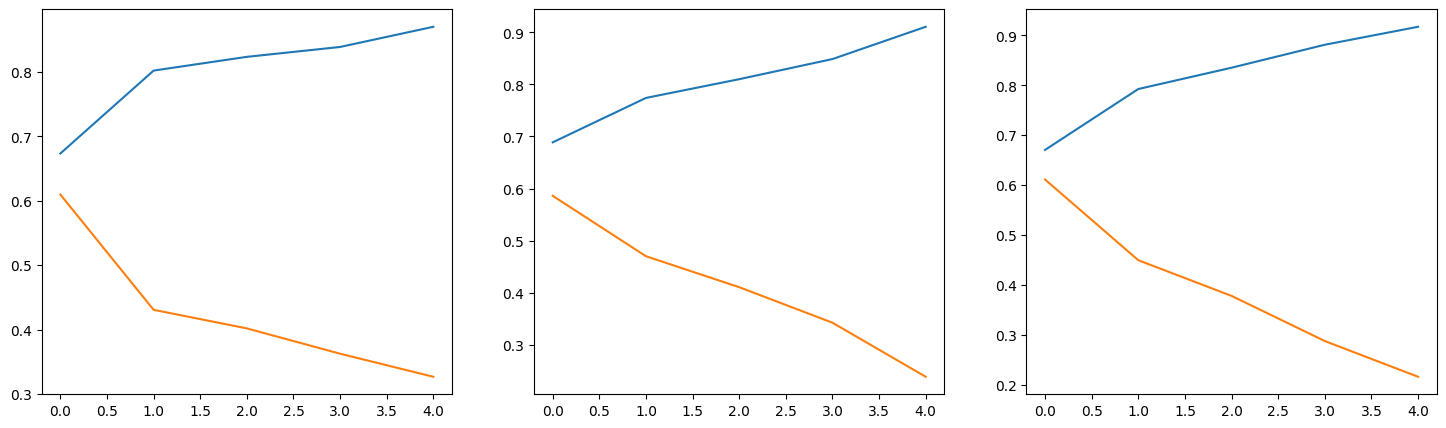

In [21]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["loss"])
plt.subplot(1, 3, 2)
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["loss"])
plt.subplot(1, 3, 3)
plt.plot(history_3.history["accuracy"])
plt.plot(history_3.history["loss"])

In [23]:
model_1.save('./models/03_cnn_model_1.keras')
model_2.save('./models/03_cnn_model_2.keras')
model_3.save('./models/03_cnn_model_3.keras')

In [27]:
import tensorflow as tf
# model_1 = tf.keras.models.load_model('./models/03_cnn_model_1.keras')
# model_2 = tf.keras.models.load_model('./models/03_cnn_model_2.keras')
# model_3 = tf.keras.models.load_model('./models/03_cnn_model_3.keras')

In [87]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory="pizza_meat/train",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
    shuffle=False
)
train_data = train_datagen.flow_from_directory(
    directory="pizza_meat/train",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [88]:
images, labels = train_data.next()
augmented_images, augemented_labels = train_data_augmented.next()


<Figure size 640x480 with 0 Axes>

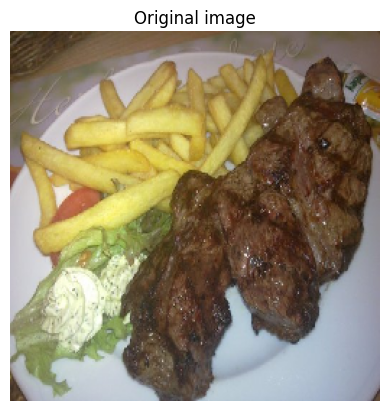

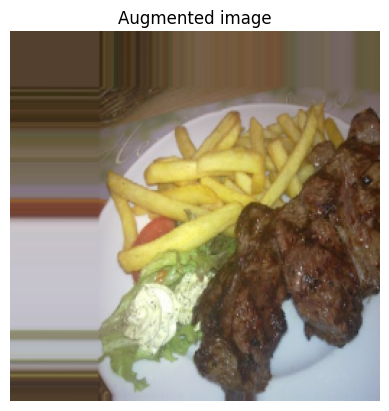

<Figure size 640x480 with 0 Axes>

In [89]:
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.figure()


In [90]:
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            10, 2, activation="relu", input_shape=(256, 256, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)


Epoch 1/5
47/47 [==============================] - 20s 420ms/step - loss: 1.3178 - accuracy: 0.4940 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 436ms/step - loss: 0.6925 - accuracy: 0.4993 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6915 - accuracy: 0.4993 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6872 - accuracy: 0.5000 - val_loss: 0.6710 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 21s 440ms/step - loss: 0.6716 - accuracy: 0.5327 - val_loss: 0.6609 - val_accuracy: 0.7460


In [97]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

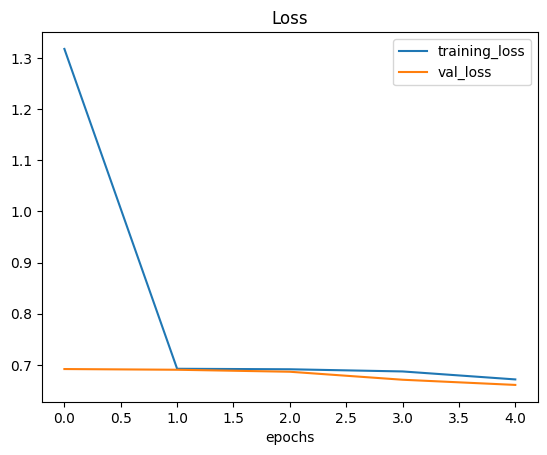

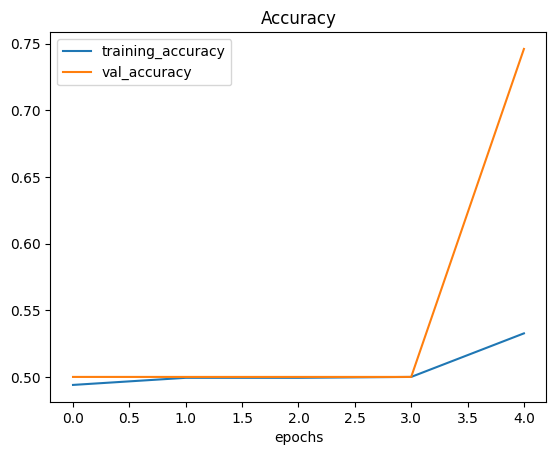

In [98]:
plot_loss_curves(history_3)

In [91]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory="pizza_meat/train",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
)
train_data = train_datagen.flow_from_directory(
    directory="pizza_meat/train",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_data = test_datagen.flow_from_directory(
    directory="pizza_meat/test",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary",
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [102]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            10, 2, activation="relu", input_shape=(256, 256, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
)


Epoch 1/5
47/47 [==============================] - 21s 434ms/step - loss: 0.7615 - accuracy: 0.5220 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 414ms/step - loss: 0.6108 - accuracy: 0.6167 - val_loss: 0.5140 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 20s 420ms/step - loss: 0.5265 - accuracy: 0.7600 - val_loss: 0.4003 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 20s 415ms/step - loss: 0.4202 - accuracy: 0.8227 - val_loss: 0.3596 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 20s 418ms/step - loss: 0.3679 - accuracy: 0.8533 - val_loss: 0.3745 - val_accuracy: 0.8440


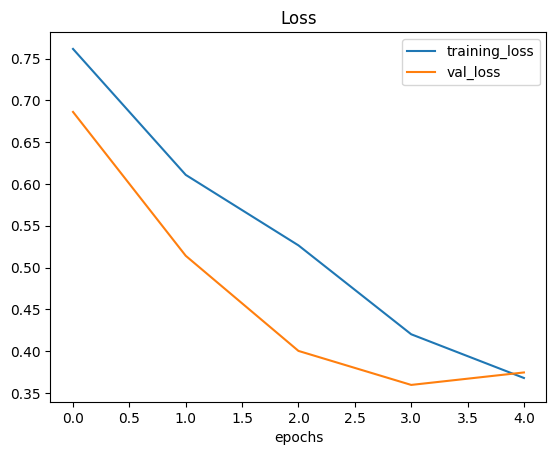

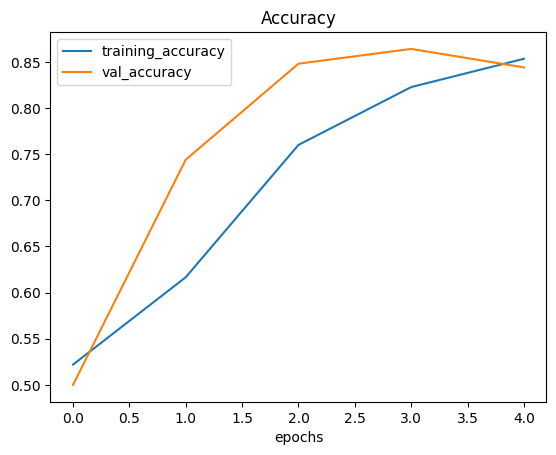

In [103]:
plot_loss_curves(history_5)

In [120]:
!curl -o ./pizza_meat/custom/pizza_test_1.jpg https://tastesbetterfromscratch.com/wp-content/uploads/2023/06/Pepperoni-Pizza-1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  231k  100  231k    0     0   375k      0 --:--:-- --:--:-- --:--:--     0--:-- --:--:-- --:--:--  378k


(1800, 1200, 3)

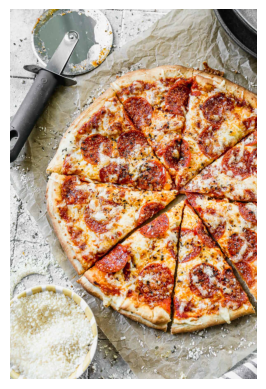

In [121]:
test_1 = mpimg.imread("./pizza_meat/custom/pizza_test_1.jpg")
plt.imshow(test_1)
plt.axis(False)
test_1.shape

In [122]:
def load_and_prep_image(filename, img_shape=256, scale=False):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  if scale:
    return img / 255.
  else:
    return img

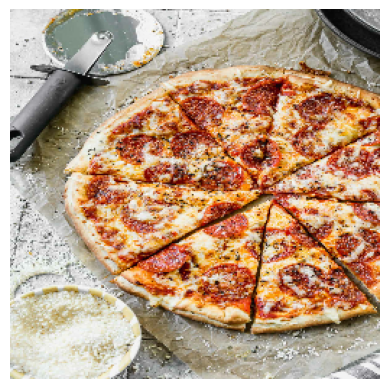

In [126]:
plt.imshow(load_and_prep_image("./pizza_meat/custom/pizza_test_1.jpg", scale=True))
plt.axis(False);

In [135]:
pred = model_5.predict(tf.expand_dims(load_and_prep_image("./pizza_meat/custom/pizza_test_1.jpg", scale=True), axis=0))

1/1 [==============================] - 0s 13ms/step


In [136]:
predicted_class = class_names[int(tf.round(pred)[0][0])]
predicted_class

'meat'

In [208]:
import requests
from os import system


def downloadImage(url, file_name):
    system(f"curl -o {file_name} {url}")


def predict_image(image_url, model= model_5, class_names=class_names):
    if image_url.startswith("http"):
        downloadImage(image_url, "tmp_image.jpg")
        image_url = "./tmp_image.jpg"
    test_1 = mpimg.imread(image_url)

    pred = model.predict(
        tf.expand_dims(load_and_prep_image(image_url, scale=True), axis=0)
    )
    predicted_class = class_names[int(tf.round(pred)[0][0])]
    

    plt.imshow(test_1)
    plt.title(f"Predicted class: {predicted_class}, probability: {np.abs((1 if predicted_class == class_names[0] else 0) - pred[0][0]):.2f}")
    plt.axis(False)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

1/1 [==============================] - 0s 29ms/step


100  231k  100  231k    0     0   433k      0 --:--:-- --:--:-- --:--:--  438k


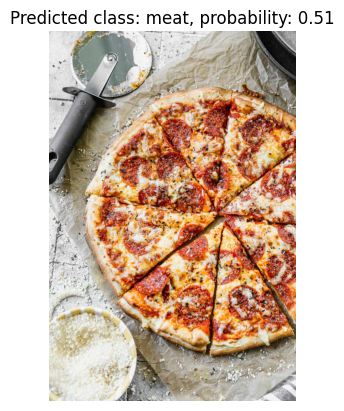

In [161]:
predict_image("https://tastesbetterfromscratch.com/wp-content/uploads/2023/06/Pepperoni-Pizza-1.jpg")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

1/1 [==============================] - 0s 14ms/step


100  172k  100  172k    0     0   461k      0 --:--:-- --:--:-- --:--:--  466k
sh: center,top: command not found


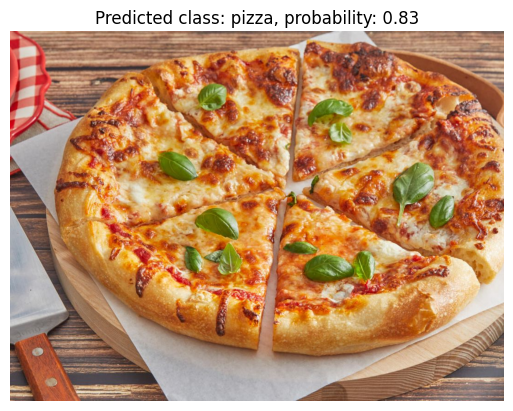

In [163]:
predict_image("https://hips.hearstapps.com/hmg-prod/images/classic-cheese-pizza-recipe-2-64429a0cb408b.jpg?crop=0.6666666666666667xw:1xh;center,top&resize=1200:*")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   264k      0 --:--:-- --:--:-- --:--:--  273k


1/1 [==============================] - 0s 20ms/step


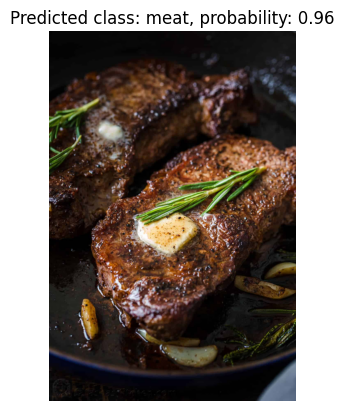

In [164]:
predict_image("https://natashaskitchen.com/wp-content/uploads/2020/03/Pan-Seared-Steak-4.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

1/1 [==============================] - 0s 15ms/step


100  186k  100  186k    0     0   692k      0 --:--:-- --:--:-- --:--:--  700k


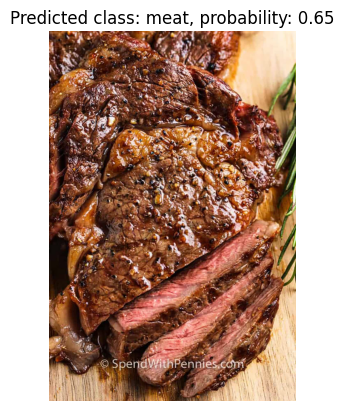

In [165]:
predict_image("https://www.spendwithpennies.com/wp-content/uploads/2022/08/1200-Perfect-Ribeye-Steak-SpendWithPennies.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

1/1 [==============================] - 0s 16ms/step


100 59036  100 59036    0     0  60326      0 --:--:-- --:--:-- --:--:-- 60425


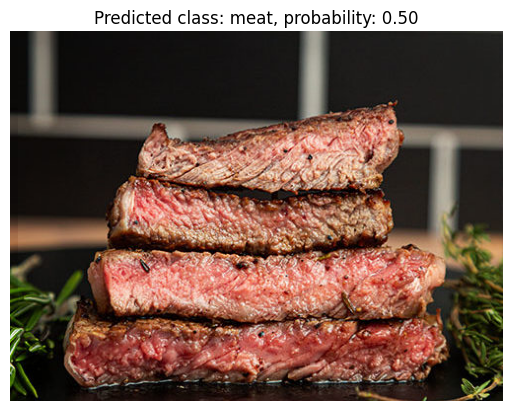

In [166]:
predict_image("https://www.howtocook.recipes/wp-content/uploads/2022/11/rare-steak-recipejpg-500x375.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1312k  100 1312k    0     0  1539k      0 --:--:-- --:--:-- --:--:-- 1547k


1/1 [==============================] - 0s 17ms/step


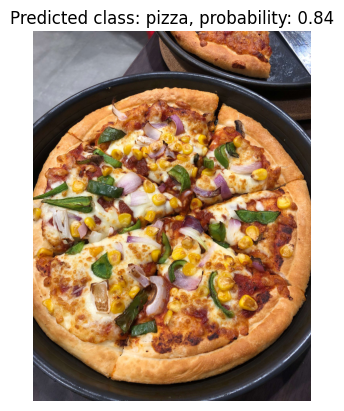

In [169]:
predict_image("https://b.zmtcdn.com/data/reviews_photos/3b8/7048460d655e041ef25da09819ee03b8_1643994064.jpg")

# Making Multi-class Classification

In [183]:
import zipfile

!curl -o ./10_food_classes_all_data.zip https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("./10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

!rm ./10_food_classes_all_data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  495M  100  495M    0     0  3387k      0  0:02:29  0:02:29 --:--:-- 3723k      0  0:03:56  0:00:04  0:03:52 2146k:03:04  0:00:09  0:02:55 3274k 3260k      0  0:02:35  0:00:56  0:01:39 3299k276k      0  0:02:34  0:00:58  0:01:36 3539k      0  0:02:31  0:01:39  0:00:52 3542k0:00:14 3180k 0:02:30  0:02:18  0:00:12 3180k


In [184]:
import pathlib
import numpy as np

data_dir = pathlib.Path("./10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [187]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
IMG_SIZE = (256, 256)

train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_data = train_datagen.flow_from_directory(
    directory="10_food_classes_all_data/train",
    batch_size=32,
    target_size=IMG_SIZE,
    class_mode="categorical",
    seed=42,
)

test_data = test_datagen.flow_from_directory(
    directory="10_food_classes_all_data/test",
    batch_size=32,
    target_size=IMG_SIZE,
    class_mode="categorical",
    seed=42,
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [188]:
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model_6.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_6 = model_6.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
)

Epoch 1/5
235/235 [==============================] - 104s 440ms/step - loss: 2.1354 - accuracy: 0.2197 - val_loss: 2.0148 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 105s 447ms/step - loss: 1.8739 - accuracy: 0.3448 - val_loss: 1.8919 - val_accuracy: 0.3212
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 1.6209 - accuracy: 0.4511 - val_loss: 1.8951 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 1.1078 - accuracy: 0.6364 - val_loss: 2.2961 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 106s 451ms/step - loss: 0.4598 - accuracy: 0.8536 - val_loss: 3.1571 - val_accuracy: 0.2824


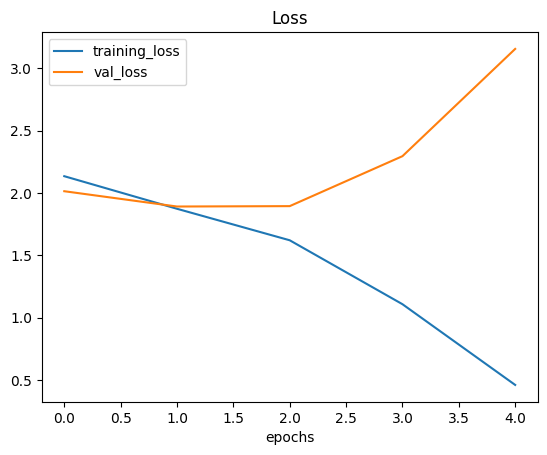

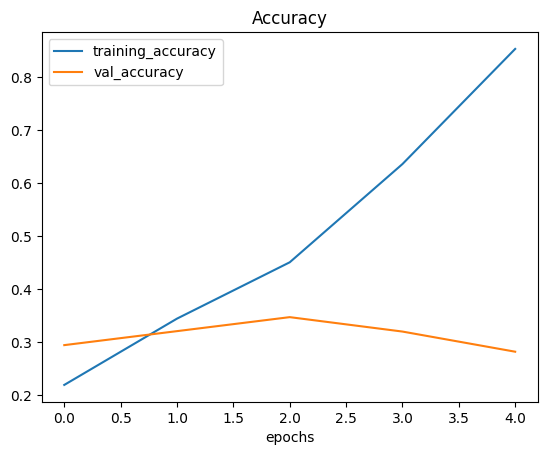

In [189]:
plot_loss_curves(history_6)

In [190]:
model_7 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_7.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

history_7 = model_7.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

Epoch 1/5
235/235 [==============================] - 40s 168ms/step - loss: 2.1175 - accuracy: 0.2520 - val_loss: 1.9701 - val_accuracy: 0.3109
Epoch 2/5
235/235 [==============================] - 39s 166ms/step - loss: 1.6610 - accuracy: 0.4500 - val_loss: 1.9881 - val_accuracy: 0.2928
Epoch 3/5
235/235 [==============================] - 39s 165ms/step - loss: 1.0613 - accuracy: 0.6633 - val_loss: 2.2487 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 0.5130 - accuracy: 0.8599 - val_loss: 2.6521 - val_accuracy: 0.2845
Epoch 5/5
235/235 [==============================] - 38s 161ms/step - loss: 0.2122 - accuracy: 0.9520 - val_loss: 3.3187 - val_accuracy: 0.3059


In [192]:
model_7.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 3.2730 - accuracy: 0.3036


[3.272989273071289, 0.303600013256073]

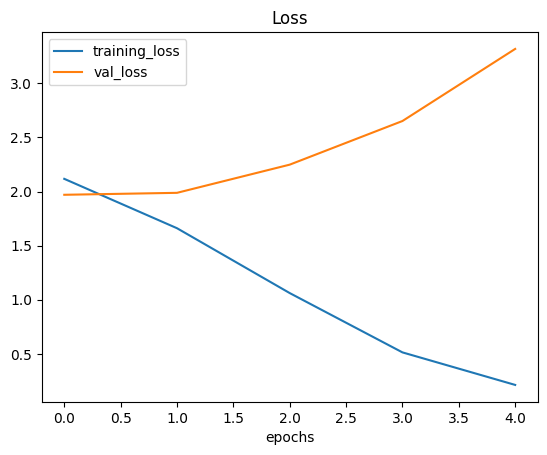

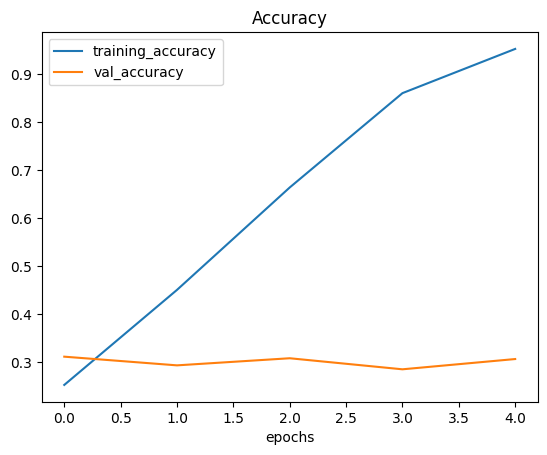

In [191]:
plot_loss_curves(history_7)

In [193]:
model_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 38440)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [200]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_8.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

In [206]:
print(model_8.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_55 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_57 (Conv2D)          (None, 59, 59, 10)      

In [202]:
history_8 = model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

Epoch 1/5
235/235 [==============================] - 85s 361ms/step - loss: 2.1828 - accuracy: 0.1928 - val_loss: 2.0219 - val_accuracy: 0.2714
Epoch 2/5
235/235 [==============================] - 80s 340ms/step - loss: 1.9013 - accuracy: 0.3380 - val_loss: 1.8130 - val_accuracy: 0.3865
Epoch 3/5
235/235 [==============================] - 79s 334ms/step - loss: 1.7642 - accuracy: 0.3893 - val_loss: 1.8032 - val_accuracy: 0.3766
Epoch 4/5
235/235 [==============================] - 81s 346ms/step - loss: 1.6692 - accuracy: 0.4255 - val_loss: 1.7539 - val_accuracy: 0.4079
Epoch 5/5
235/235 [==============================] - 81s 344ms/step - loss: 1.5526 - accuracy: 0.4695 - val_loss: 1.7254 - val_accuracy: 0.4178


In [203]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 103ms/step - loss: 1.7201 - accuracy: 0.4196


[1.7201337814331055, 0.4196000099182129]

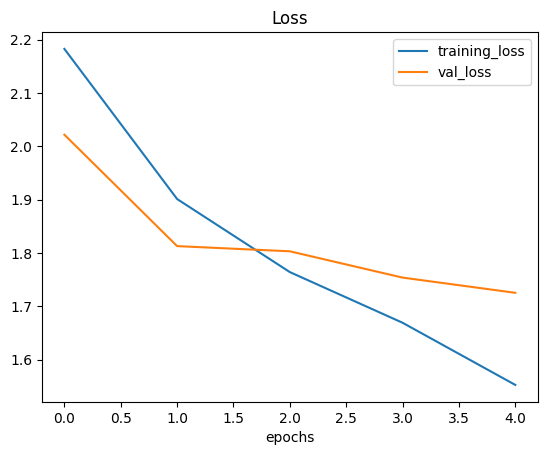

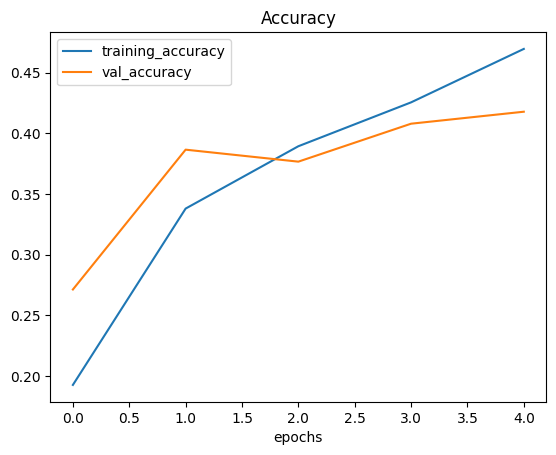

In [204]:
plot_loss_curves(history_8)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_59 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 conv2d_61 (Conv2D)          (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 61, 61, 10)        0         
 ng2D)                                               

[2.366783857345581, 0.295199990272522]

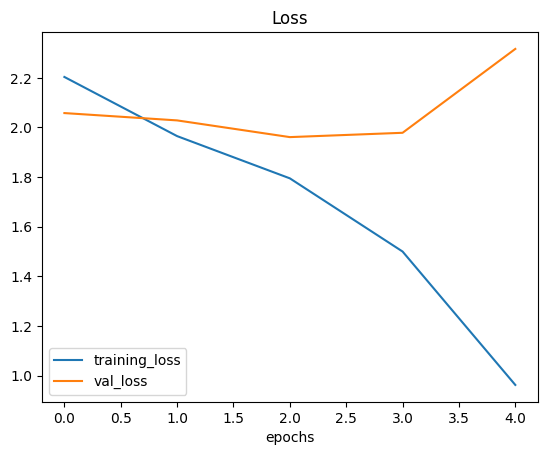

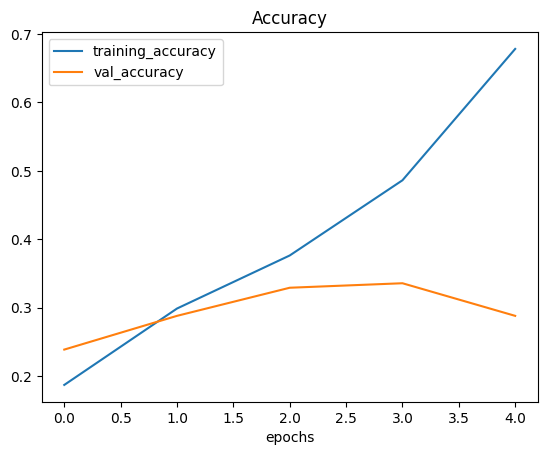

In [207]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_9.summary())

history_9 = model_9.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_9)

model_9.evaluate(test_data)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_69 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_71 (Conv2D)          (None, 59, 59, 10)      

[1.8740447759628296, 0.3452000021934509]

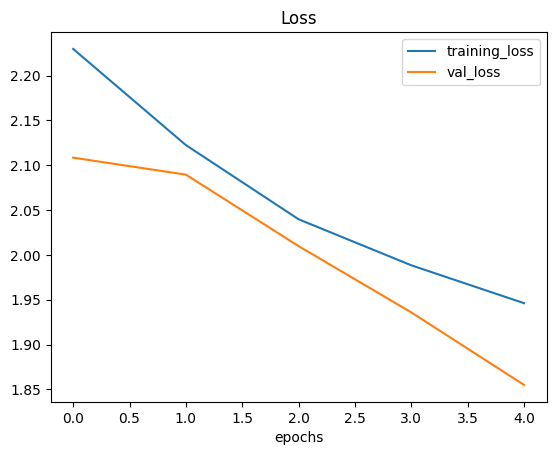

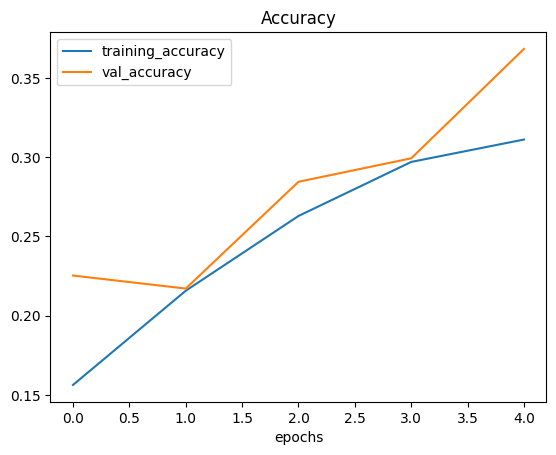

In [210]:
model_10 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_10.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_10.summary())

history_10 = model_10.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_10)

model_10.evaluate(test_data)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_55 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_57 (Conv2D)          (None, 59, 59, 10)      

[1.7742393016815186, 0.3991999924182892]

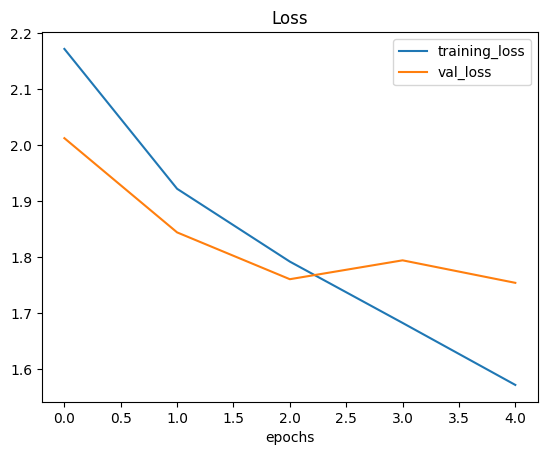

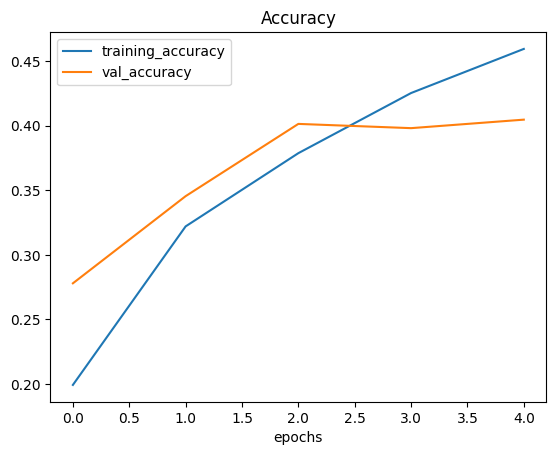

In [212]:
# trying adam without legacy

model_11 = tf.keras.models.clone_model(model_8)

model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

print(model_11.summary())

history_11 = model_11.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_11)

model_11.evaluate(test_data)

In [214]:
print(model_8.evaluate(test_data))
print(model_11.evaluate(test_data))

79/79 [==============================] - 8s 95ms/step - loss: 1.7201 - accuracy: 0.4196
[1.7201337814331055, 0.4196000099182129]
79/79 [==============================] - 8s 94ms/step - loss: 1.7742 - accuracy: 0.3992
[1.7742390632629395, 0.3991999924182892]


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_79 (Conv2D)          (None, 252, 252, 10)      910       


                                                                 
 max_pooling2d_58 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_81 (Conv2D)          (None, 59, 59, 10)        910       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 29, 29, 10)        0         
 ng2D)                                                           
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)    

[2.3036820888519287, 0.10000000149011612]

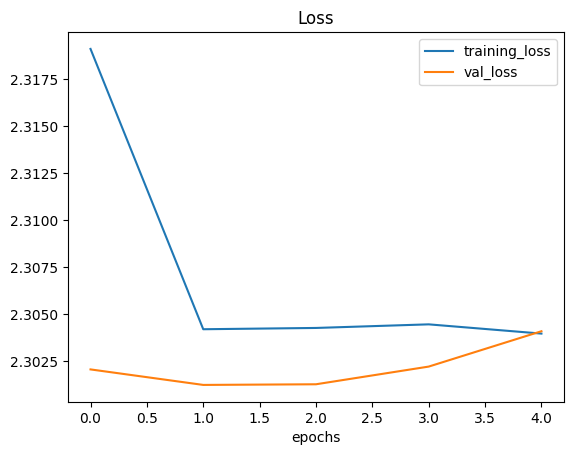

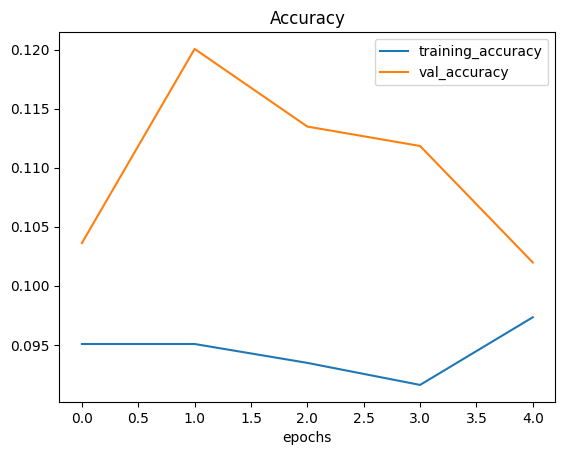

In [215]:
# trying - higher learning rate

model_12 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=["accuracy"],
)

print(model_12.summary())

history_12 = model_12.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_12)

model_12.evaluate(test_data)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_83 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_85 (Conv2D)          (None, 59, 59, 10)      

[2.1034603118896484, 0.40560001134872437]

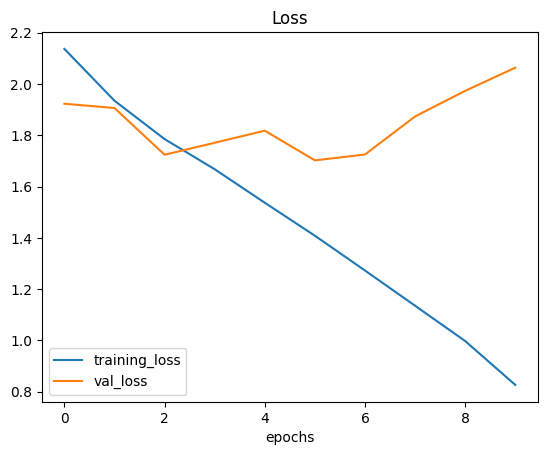

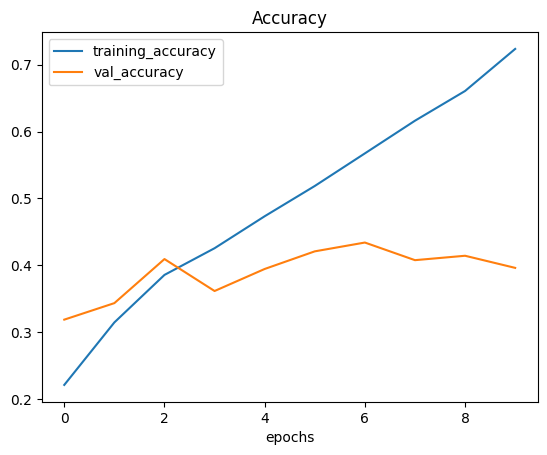

In [216]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_13.summary())

history_13 = model_13.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_13)

model_13.evaluate(test_data)

In [205]:
training_dataget_augmented = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


train_data_augmented = training_dataget_augmented.flow_from_directory(
    "10_food_classes_all_data/train",
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical",
)

Found 7500 images belonging to 10 classes.


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_87 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_89 (Conv2D)          (None, 59, 59, 10)      

[1.7661484479904175, 0.4092000126838684]

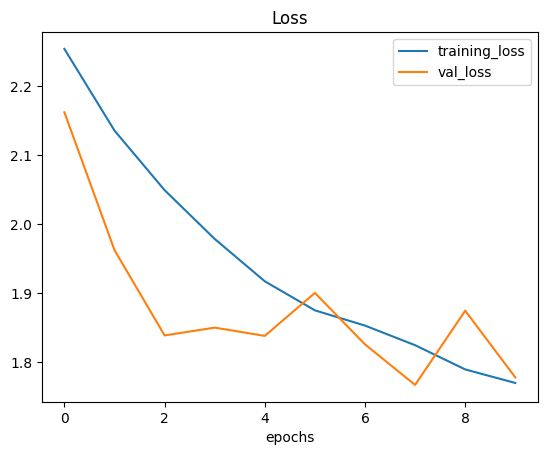

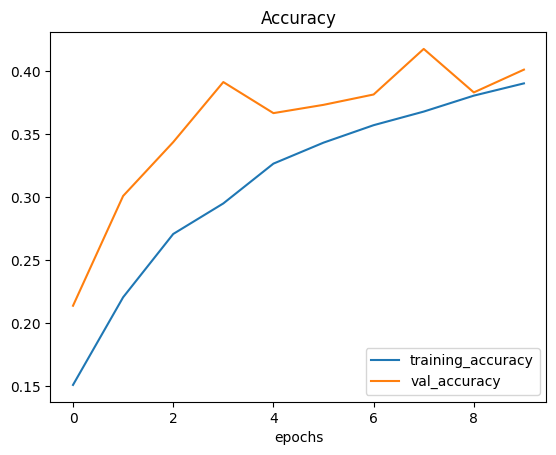

In [217]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_14.summary())

history_14 = model_14.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_14)

model_14.evaluate(test_data)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_91 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 61, 61, 10)        910       
                                                                 
 conv2d_93 (Conv2D)          (None, 59, 59, 10)      

[1.7564351558685303, 0.4399999976158142]

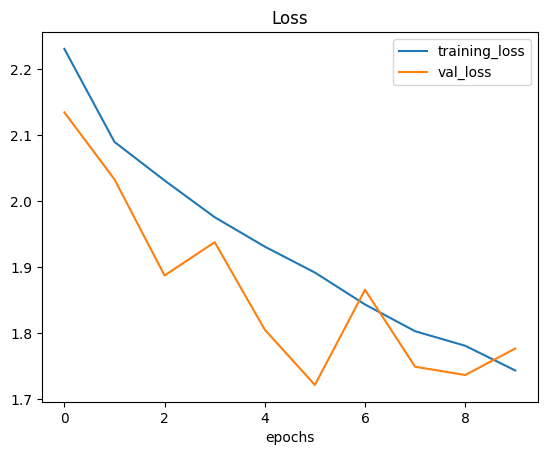

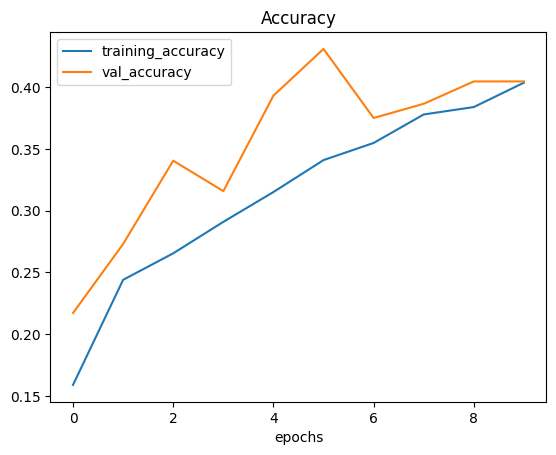

In [218]:
model_15 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_15.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_15.summary())

history_15 = model_15.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_15)

model_15.evaluate(test_data)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 254, 254, 10)      280       
                                                                 
 conv2d_107 (Conv2D)         (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 63, 63, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 61, 61, 10)        910       
                                                                 
 conv2d_109 (Conv2D)         (None, 59, 59, 10)      

[1.5458400249481201, 0.4896000027656555]

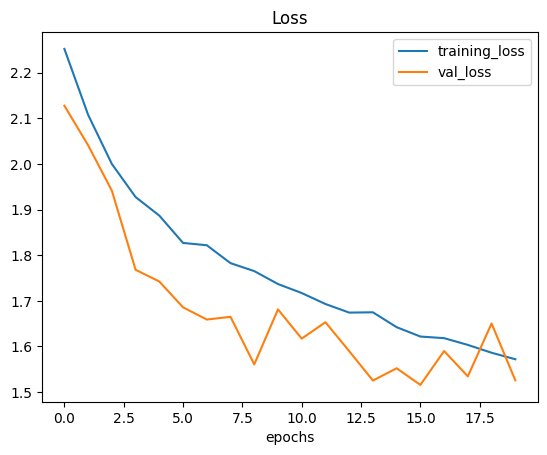

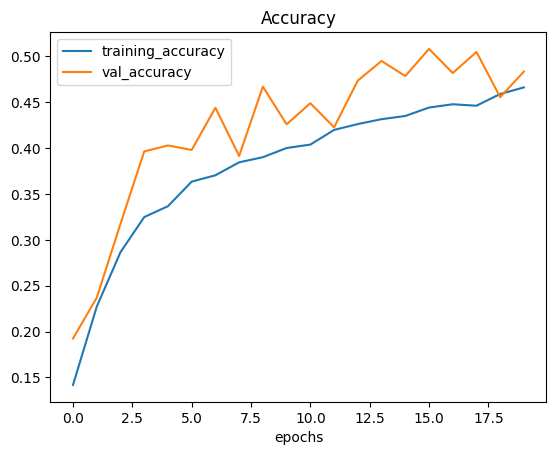

In [222]:
model_16 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_16.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

print(model_16.summary())

history_16 = model_16.fit(
    train_data_augmented,
    epochs=20,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
)

plot_loss_curves(history_16)

model_16.evaluate(test_data)